In [ ]:
'''These operations are part of feature selection techniques,
 which are used to identify the most relevant features (or variables) for building a machine learning model.
 Here's how each of them contributes to feature selection:
***mutual_info_classif(X, y): Measures the amount of information shared between each feature and the target, helping identify informative features.
***f_classif(X, y): Assesses how well each feature explains the variance in the target, identifying features with a strong relationship to the target.
***chi2(X, y): Tests the association between categorical features and the target, helping identify significant categorical features.
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv('Loan Prediction Dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.drop(['Gender'],axis=1,inplace=True)
df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<Axes: >

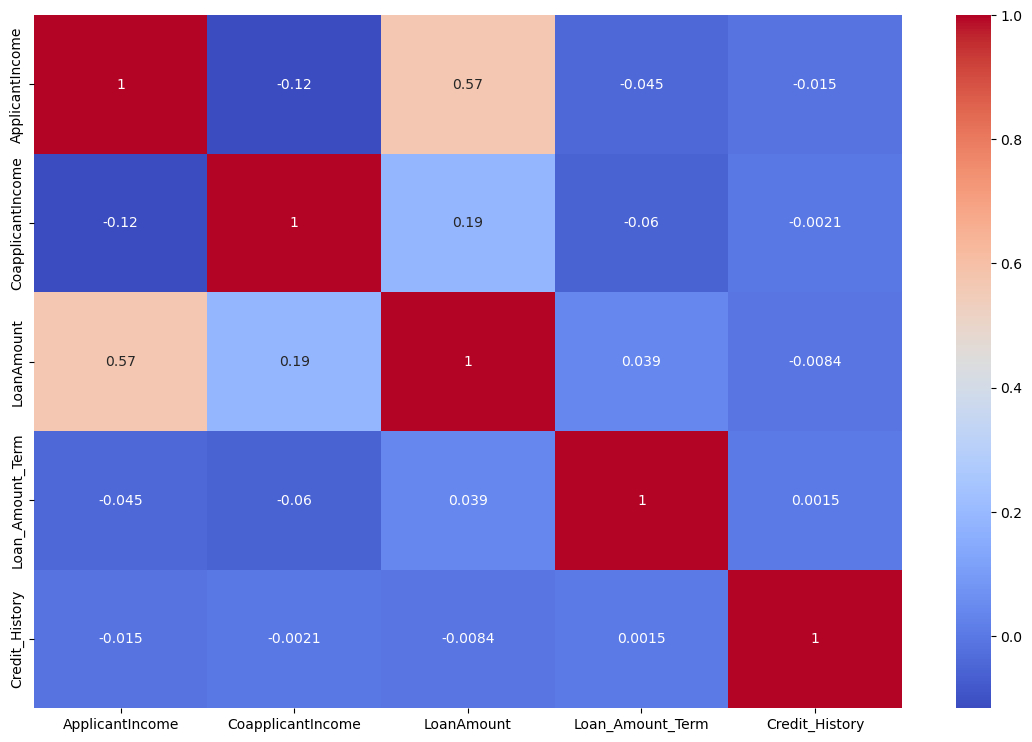

In [ ]:
# display correlation matrix in heatmap
corr = df.select_dtypes(include=[np.number]).corr() #This calculates the correlation matrix of the numerical columns in the DataFrame.
plt.figure(figsize=(14,9))#This creates a figure with a size of 14 inches by 9 inches to plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')#This uses Seaborn (sns) to create a heatmap of the correlation matrix (corr).


In [13]:
df = pd.read_csv('Loan Prediction Dataset.csv')#This reads a CSV file
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]#retains only the listed columns
for col in df.columns: #loop over each column in the DataFrame df
    df[col] = df[col].fillna(df[col].mode()[0])#gets the first mode value (the most frequent one) for the current column.
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [14]:
from sklearn.preprocessing import LabelEncoder# convert categorical labels into numerical values
for col in df.columns:
    le = LabelEncoder()#For each column, an instance of the LabelEncoder is created
    df[col] = le.fit_transform(df[col])#The transformed (numerical) values are then assigned back to the original column in the DataFrame.
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


In [16]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
X = df.drop(columns=['Loan_Status'], axis=1)  #Loan_Status is the  variable you want to predict
#axis=1 argument specifies that a column is being dropped (if it was axis=0, it would drop rows instead
y = df['Loan_Status'] #This column will be used to train the model and make predictions.

In [17]:
mutual_info_classif=mutual_info_classif(X, y)#calculates the mutual information between each feature in X and the target variable y
mutual_info_classif

array([0.00715593, 0.        , 0.        , 0.00319252, 0.        ,
       0.09850533, 0.        ])

In [18]:
f_classif=f_classif(X, y)
f_classif

'''The output, f_classif, contains two arrays:
F-statistics: Measures the variance between groups for each feature.
p-values: The probability that the observed relationship occurred by chance.'''

(array([1.98058690e-01, 5.16455172e+00, 6.26648861e-02, 4.54768458e+00,
        8.38037720e-03, 2.52652090e+02, 6.31733319e-01]),
 array([6.56449758e-01, 2.33983628e-02, 8.02416513e-01, 3.33606775e-02,
        9.27089984e-01, 7.01968203e-48, 4.27028351e-01]))

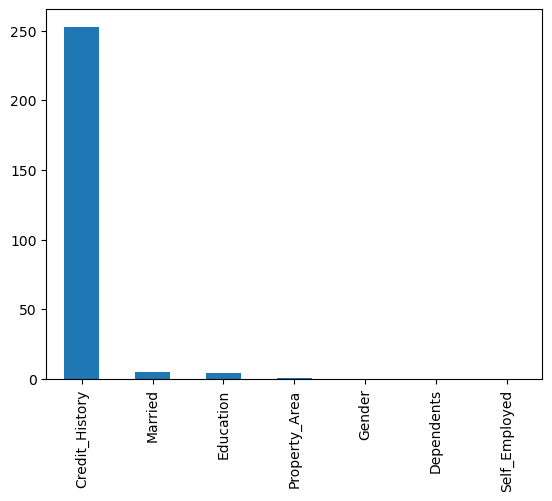

In [19]:
# higher the chi value, higher the importance
f_classif = pd.Series(f_classif[0], index=X.columns)
f_classif.sort_values(ascending=False, inplace=True)
f_classif.plot.bar()
plt.show()

In [20]:
chi_scores = chi2(X, y)
chi_scores
# test for each feature in X to determine its statistical significance in relation to the target variable y.

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 2.60058772e+01, 3.77837464e-01]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 3.40379591e-07, 5.38762867e-01]))

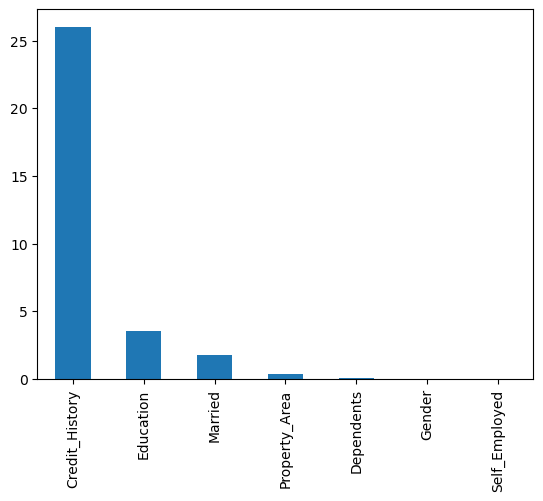

In [21]:
# higher the chi value, higher the importance
f_classif = pd.Series(chi_scores[0], index=X.columns)
f_classif.sort_values(ascending=False, inplace=True)
f_classif.plot.bar()
plt.show()

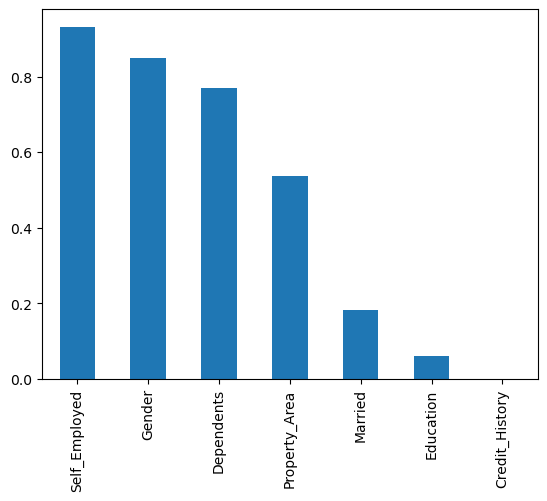

In [22]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()
plt.show()